In [60]:
from datetime import datetime, date
from nowtrade.symbol_list import StockList
from nowtrade.data_connection import YahooConnection
from nowtrade import dataset 
from nowtrade import technical_indicator
from nowtrade import criteria
from nowtrade import criteria_group
from nowtrade import trading_profile
from nowtrade import trading_amount
from nowtrade import trading_fee
from nowtrade import strategy
from nowtrade import neural_network
from nowtrade.action import Long
from nowtrade.action import Short
from nowtrade.action import LongExit
from nowtrade.action import ShortExit

In [61]:
%matplotlib inline
import pandas as pd
import numpy as np
from pathlib import Path


In [62]:
symbol = 'BHARTIARTL.NS'
symbols=StockList([symbol])
symbol = symbols.get(symbol)

today = date.today()
train_start = datetime(today.year-6, today.month, 28)
train_end = datetime.fromisoformat(today.replace(day=1).isoformat())
train_dataset = dataset.Dataset(symbols,YahooConnection(), train_start, train_end)


In [63]:
train_dataset.load_data()

In [64]:
train_dataset.data_frame.columns

Index(['BHARTIARTL.NS_High', 'BHARTIARTL.NS_Low', 'BHARTIARTL.NS_Open',
       'BHARTIARTL.NS_Close', 'BHARTIARTL.NS_Volume',
       'BHARTIARTL.NS_Adj Close'],
      dtype='object')

In [65]:
train_dataset.data_frame.head()

,BHARTIARTL.NS_High,BHARTIARTL.NS_Low,BHARTIARTL.NS_Open,BHARTIARTL.NS_Close,BHARTIARTL.NS_Volume,BHARTIARTL.NS_Adj Close
Date,,,,,,
2015-03-02,333.298737,317.230621,327.146942,320.490173,4534701.0,308.872284
2015-03-03,321.913330,315.577911,321.362427,320.673798,2251216.0,309.049255
2015-03-04,329.075134,320.719696,323.198792,322.510162,3626477.0,310.819031
2015-03-05,323.106964,315.899261,322.647888,319.434265,3807730.0,307.854614
2015-03-09,318.378357,311.354279,318.378357,315.348358,3753392.0,303.916809


In [66]:
#nn = neural_network.NeuralNetwork([symbol.open, symbol.high, symbol.low, symbol.close, symbol.volume], [symbol.close])
nn = neural_network.NeuralNetwork([symbol.open, symbol.high, symbol.low, symbol.volume], [symbol.close])

In [67]:
nn.build_network(train_dataset, hidden_layers=3, prediction_window=1, learning_rate=0.001, momentum=0.1)

            BHARTIARTL.NS_Open  BHARTIARTL.NS_High  BHARTIARTL.NS_Low  \
Date                                                                    
2015-03-02            5.790409            5.809039           5.759629   
2015-03-03            5.772570            5.774282           5.754406   
2015-03-04            5.778268            5.796286           5.770568   
2015-03-05            5.776562            5.777983           5.755423   
2015-03-09            5.763240            5.763240           5.740931   

            BHARTIARTL.NS_Volume  PREDICTION_BHARTIARTL.NS_Close  
Date                                                              
2015-03-02             15.327270                        5.770424  
2015-03-03             14.626981                        5.776135  
2015-03-04             15.103772                        5.766552  
2015-03-05             15.152544                        5.753678  
2015-03-09             15.138171                        5.822583  


In [69]:
train_intervals= 15

In [70]:
nn.train_data

['BHARTIARTL.NS_Open',
 'BHARTIARTL.NS_High',
 'BHARTIARTL.NS_Low',
 'BHARTIARTL.NS_Volume']

In [71]:
for i in range(train_intervals): nn.train()

Total error:  2.21573856193
Total error:  0.0208007749016
Total error:  0.0207568912816
Total error:  0.0207721012604
Total error:  0.0207716589932
Total error:  0.0207688257164
Total error:  0.0207549614708
Total error:  0.020744131913
Total error:  0.020711763217
Total error:  0.0207442706598
Total error:  0.0207511078066
Total error:  0.0207378143873
Total error:  0.0207423175946
Total error:  0.0207046927427
Total error:  0.0207127517812


In [72]:
nn.save_to_file('test.nn')

In [73]:
nn = neural_network.load_from_file('test.nn')

In [74]:
test_start = train_end
test_end = datetime.fromisoformat(today.isoformat())
test_dataset = dataset.Dataset(symbols, YahooConnection(), test_start, test_end)

In [75]:
test_dataset.load_data()

In [76]:
neural_network = technical_indicator.NeuralNetwork(nn)

In [77]:
test_dataset.add_technical_indicator(neural_network)

In [78]:
threshold_above = technical_indicator.Addition(neural_network.value, 5)

In [79]:
test_dataset.add_technical_indicator(threshold_above)

In [80]:
threshold_below = technical_indicator.Subtraction(neural_network.value, 5)
test_dataset.add_technical_indicator(threshold_below)

In [81]:
test_dataset.data_frame.head()

,BHARTIARTL.NS_High,BHARTIARTL.NS_Low,BHARTIARTL.NS_Open,BHARTIARTL.NS_Close,BHARTIARTL.NS_Volume,BHARTIARTL.NS_Adj Close,NEURAL_NETWORK_3bf422fe-921d-40ff-9569-bea6f5f518bf,ADDITION_NEURAL_NETWORK_3bf422fe-921d-40ff-9569-bea6f5f518bf_5,SUBTRACTION_NEURAL_NETWORK_3bf422fe-921d-40ff-9569-bea6f5f518bf_5
Date,,,,,,,,,
2021-02-01,581.099976,549.200012,559.000000,579.150024,13951025,579.150024,367.434915,372.434915,362.434915
2021-02-02,605.650024,579.250000,584.900024,599.349976,21311866,599.349976,367.758092,372.758092,362.758092
2021-02-03,622.500000,599.450012,609.400024,608.849976,30076561,608.849976,367.965020,372.965020,362.965020
2021-02-04,623.000000,595.650024,614.900024,600.599976,51018799,600.599976,368.215288,373.215288,363.215288
2021-02-05,605.900024,576.250000,603.799988,581.099976,34811620,581.099976,368.068553,373.068553,363.068553


In [82]:
enter_crit_long = criteria.Below(symbol.close, threshold_below.value)

In [83]:
enter_crit_short = criteria.Above(symbol.close, threshold_above.value)

In [84]:
exit_crit_long = criteria.BarsSinceLong(symbol, 1)
exit_crit_short = criteria.BarsSinceShort(symbol, 1)

In [85]:
enter_crit_group1 = criteria_group.CriteriaGroup([enter_crit_long], Long(), symbol)
enter_crit_group2 = criteria_group.CriteriaGroup([enter_crit_short], Short(), symbol)
exit_crit_group1 = criteria_group.CriteriaGroup([exit_crit_long], LongExit(), symbol)
exit_crit_group2 = criteria_group.CriteriaGroup([exit_crit_short], ShortExit(), symbol)

In [86]:
tp = trading_profile.TradingProfile(100000, trading_amount.StaticAmount(10000), trading_fee.StaticFee(5))

In [87]:
test_dataset.data_frame.tail()

,BHARTIARTL.NS_High,BHARTIARTL.NS_Low,BHARTIARTL.NS_Open,BHARTIARTL.NS_Close,BHARTIARTL.NS_Volume,BHARTIARTL.NS_Adj Close,NEURAL_NETWORK_3bf422fe-921d-40ff-9569-bea6f5f518bf,ADDITION_NEURAL_NETWORK_3bf422fe-921d-40ff-9569-bea6f5f518bf_5,SUBTRACTION_NEURAL_NETWORK_3bf422fe-921d-40ff-9569-bea6f5f518bf_5
Date,,,,,,,,,
2021-02-04,623.000000,595.650024,614.900024,600.599976,51018799,600.599976,368.215288,373.215288,363.215288
2021-02-05,605.900024,576.250000,603.799988,581.099976,34811620,581.099976,368.068553,373.068553,363.068553
2021-02-08,603.650024,584.700012,589.000000,597.299988,21247165,597.299988,367.757503,372.757503,362.757503
2021-02-09,607.750000,595.000000,598.900024,598.950012,20541765,598.950012,367.724184,372.724184,362.724184
2021-02-10,607.750000,580.250000,604.950012,590.200012,31051947,590.200012,368.005972,373.005972,363.005972


In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
from nowtrade.figures import Figure

In [89]:
#test_dataset.data_frame.plot()

In [90]:
strat = strategy.Strategy(test_dataset, [enter_crit_group1, enter_crit_group2, exit_crit_group1, exit_crit_group2], tp)

In [91]:
strat.simulate()

In [92]:
print(strat.report.overview())

{'average_trading_amount': 15246.025207519531, 'average_fees': 12.5, 'average_slippage': 0.0, 'average_gains': -2.128295524834872, 'average_winner': 0.7202949446449187, 'average_loser': -4.976885994314664, 'average_bars': 2.0, 'profitability': 50.0, 'gross_profit': 73.29937744140625, 'gross_loss': -520.0, 'net_profit': -446.70062255859375, 'winning_trades': 1, 'losing_trades': 1, 'sharpe_ratio': -4.984784761170944, 'total_fees': 25.0, 'total_slippage': 0.0, 'trades': 2, 'lacking_capital': 0, 'ongoing_trades': 1, 'trade_history': {BHARTIARTL.NS: [Trade([Timestamp('2021-02-02 00:00:00'), 'SHORT', BHARTIARTL.NS, 584.9000244140625, 17, 9943.300415039062, 5, 0.0]), Trade([Timestamp('2021-02-04 00:00:00'), 'SHORT_EXIT', BHARTIARTL.NS, 614.9000244140625, 17, 10453.300415039062, 5, 0.0]), Trade([Timestamp('2021-02-05 00:00:00'), 'SHORT', BHARTIARTL.NS, 603.7999877929688, 17, 10264.599792480469, 5, 0.0]), Trade([Timestamp('2021-02-09 00:00:00'), 'SHORT_EXIT', BHARTIARTL.NS, 598.9000244140625, 1

In [93]:
#fig = Figure(test_dataset, rows=4)

In [94]:
#fig.add_chart('Date', 1) # First chart holds the googl candlesticks
#fig.add_chart('GOOGL_Volume', 2, 'bar') # Second chart holds the volume
#fig.add_chart('NEURAL_NETWORK_e6b1f791-8c5c-4d7a-9f34-4e7c1aaa6f8a', 3) # Third chart holds the simple moving averages
#fig.add_chart('ADDITION_NEURAL_NETWORK_e6b1f791-8c5c-4d7a-9f34-4e7c1aaa6f8a_5', 4, color='red') # SMA25 will have a red line
#fig.add_capital_chart(4) # Show the capital history on the last chart

In [95]:
#fig.show()

In [96]:
import matplotlib
matplotlib.style.use('ggplot')

In [97]:
#test_dataset.data_frame['Date']
n_net='NEURAL_NETWORK_'+neural_network.name

In [98]:
#plt.figure();
z=test_dataset.data_frame.loc[:,[symbol.volume,symbol.close,n_net]]


In [99]:
z

,BHARTIARTL.NS_Volume,BHARTIARTL.NS_Close,NEURAL_NETWORK_3bf422fe-921d-40ff-9569-bea6f5f518bf
Date,,,
2021-02-01,13951025,579.150024,367.434915
2021-02-02,21311866,599.349976,367.758092
2021-02-03,30076561,608.849976,367.965020
2021-02-04,51018799,600.599976,368.215288
2021-02-05,34811620,581.099976,368.068553
2021-02-08,21247165,597.299988,367.757503
2021-02-09,20541765,598.950012,367.724184
2021-02-10,31051947,590.200012,368.005972


In [100]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [101]:
mms=MinMaxScaler()

In [102]:
G_Close_min_max=mms.fit_transform(np.array(z[symbol.close]).reshape(1,-1))

In [103]:
NN_Close_predict=mms.fit_transform(np.array(test_dataset.data_frame[n_net]).reshape(1,-1))

In [104]:
import pandas as pd

In [105]:
z['NN_Predict']=test_dataset.data_frame[n_net]

In [106]:
z=z.drop(n_net,1)

In [107]:
#z=z.drop('Date',1)

In [108]:
zz=pd.DataFrame(mms.fit_transform(z))

In [109]:
zz.columns=z.columns

In [110]:
zz=zz.set_index(z.index)

In [111]:
zz.head()

,BHARTIARTL.NS_Volume,BHARTIARTL.NS_Close,NN_Predict
Date,,,
2021-02-01,0.000000,0.000000,0.000000
2021-02-02,0.198578,0.680134,0.414131
2021-02-03,0.435028,1.000000,0.679297
2021-02-04,1.000000,0.722222,1.000000
2021-02-05,0.562769,0.065655,0.811968


<AxesSubplot:xlabel='Date'>

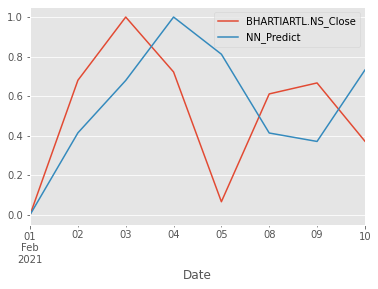

In [112]:
#df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}
zz[[symbol.close,'NN_Predict']].plot()

In [113]:
zz[:20]

,BHARTIARTL.NS_Volume,BHARTIARTL.NS_Close,NN_Predict
Date,,,
2021-02-01,0.000000,0.000000,0.000000
2021-02-02,0.198578,0.680134,0.414131
2021-02-03,0.435028,1.000000,0.679297
2021-02-04,1.000000,0.722222,1.000000
2021-02-05,0.562769,0.065655,0.811968
2021-02-08,0.196832,0.611111,0.413377
2021-02-09,0.177802,0.666667,0.370680
2021-02-10,0.461342,0.372054,0.731774


In [114]:
print(strat.report.pretty_overview())

Trades:
BHARTIARTL.NS
Trade(datetime=2021-02-02 00:00:00, action=SHORT, symbol=BHARTIARTL.NS, price=584.9000244140625, shares=17, money=9943.300415039062, fee=5, slippage=0.0)
Trade(datetime=2021-02-04 00:00:00, action=SHORT_EXIT, symbol=BHARTIARTL.NS, price=614.9000244140625, shares=17, money=10453.300415039062, fee=5, slippage=0.0)
Trade(datetime=2021-02-05 00:00:00, action=SHORT, symbol=BHARTIARTL.NS, price=603.7999877929688, shares=17, money=10264.599792480469, fee=5, slippage=0.0)
Trade(datetime=2021-02-09 00:00:00, action=SHORT_EXIT, symbol=BHARTIARTL.NS, price=598.9000244140625, shares=17, money=10181.300415039062, fee=5, slippage=0.0)
Trade(datetime=2021-02-10 00:00:00, action=SHORT, symbol=BHARTIARTL.NS, price=604.9500122070312, shares=17, money=10284.150207519531, fee=5, slippage=0.0)
Profitability: 50.0
# Trades: 2
Net Profit: -446.70062255859375
Gross Profit: 73.29937744140625
Gross Loss: -520.0
Winning Trades: 1
Losing Trades: 1
Sharpe Ratio: -4.984784761170944
Avg. Tradin